# Credit Card Fraud Detection

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

In this dataset I will build a model that predict the fraudulent transactions base on various factors and find out what factor have largest impact on which the transaction is classified as fraud. It contains only numerical input variables which are the result of a PCA transformation due to the confidentiality issues.

In [63]:
import warnings

warnings.filterwarnings("ignore")

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

In [27]:
df = pd.read_csv(r'C:\Users\lehon\Documents\casestudydata\Python projects\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 # Let's look into the dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
df.shape

(284807, 31)

In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    0.998273
1    0.001727
Name: Class, dtype: float64


<Axes: >

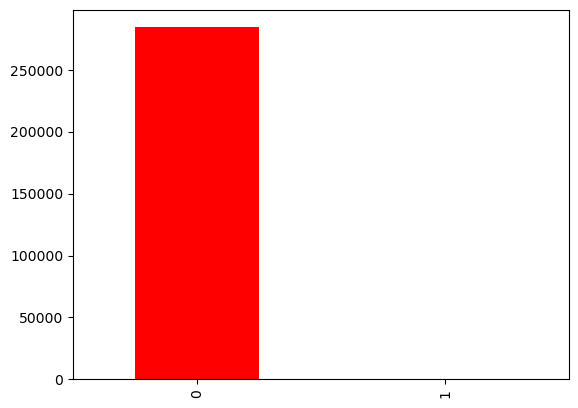

In [34]:
print(df.Class.value_counts(normalize=True))
df.Class.value_counts().plot.bar(color=['red', 'green'])

- Due to being transformed by PCA the dataset contain only float and int observations

- After discover the gap of data between each feature scaling the data is necessary

- The Class columns which indicate the transaction is a fraud or not is highly skewed stratified split and other step are necessary in building the model

# Transformed the data

In [290]:
X = df.drop('Class', axis=1)
y = df.Class

In [291]:
sss = StratifiedShuffleSplit(test_size=0.3, random_state=10)
Train_index, test_index = next(sss.split(X, y))

In [292]:
X_train = X.iloc[Train_index]
y_train = y.iloc[Train_index]
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]

# Create function and import necessary library

In [266]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_auc_score, average_precision_score
import xgboost as xgb
import lightgbm as lgb

In [168]:
def get_accuracy(y_test, y_pred):
    result = {}
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    aps = average_precision_score(y_test, y_pred)
    result['precision'] = precision
    result['recall'] = recall
    result['fscore'] = fscore
    result['aps'] = aps
    result['roc'] = roc
    return pd.DataFrame(result)

In [348]:
def split_data(X, y):   
    Train_index, test_index = next(StratifiedShuffleSplit(random_state=10).split(X,y))
    X_train = X.iloc[Train_index]
    y_train = y.iloc[Train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    return X_train, X_test, y_train, y_test

In [420]:
def get_all(X_train, X_test, y_train, y_test, model, param=None):
    if param:
        grid = GridSearchCV(model, param, cv=3, n_jobs=-1).fit(X_train, y_train)
        best = grid.best_estimator_
        best.fit(X_train, y_train)
        accuracy = get_accuracy(y_test, best.predict(X_test))
        return accuracy, grid.best_params_
    else:
        model.fit(X_train, y_train)
        accuracy = get_accuracy(y_test, model.predict(X_test))
        return accuracy

In [363]:
get_all(X_train, X_test, y_train, y_test, lgb.LGBMClassifier())

[LightGBM] [Info] Number of positive: 443, number of negative: 255883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 256326, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001728 -> initscore=-6.358906
[LightGBM] [Info] Start training from score -6.358906


,precision,recall,fscore,aps,roc
0,0.999294,0.996131,0.997710,0.124179,0.793984
1,0.208633,0.591837,0.308511,0.124179,0.793984


In [367]:
X_train, X_test, y_train, y_test = split_data(X, y)

# Random forest (non_weight vs weighted)

In [380]:
get_all(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=10, oob_score=True, n_jobs=-1, warm_start=True))

,precision,recall,fscore,aps,roc
0,0.999578,0.999859,0.999719,0.681855,0.877481
1,0.902439,0.755102,0.822222,0.681855,0.877481


In [381]:
get_all(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=10, class_weight={0:0.1,1:0.9},oob_score=True, n_jobs=-1, warm_start=True))

,precision,recall,fscore,aps,roc
0,0.999578,0.999930,0.999754,0.7168,0.877516
1,0.948718,0.755102,0.840909,0.7168,0.877516


- Random forest doing good in precision and roc but low in recall, aps (average_precision_score)
- After assigning the weight of the class it seem that the model is doing better

# Try XGboost function

In [408]:
#Generating parameter for gridsearchCV
param_XGboost ={'n_estimators': [100, 200, 300, 400],
'max_depth': [3, 4, 5],
'min_child_weight': [1, 2, 3],
'subsample': [0.8, 0.9, 1.0],
'colsample_bytree': [0.8, 0.9, 1.0]}

weight = {'scale_pos_weight':[10,20,30,40,100,200,300,400,500]}

In [406]:
get_all(X_train, X_test, y_train, y_test, xgb.XGBClassifier(n_jobs=-1), weight)

,precision,recall,fscore,aps,roc
0,0.999648,0.999859,0.999754,0.722231,0.897889
1,0.906977,0.795918,0.847826,0.722231,0.897889


In [393]:
get_all(X_train, X_test, y_train, y_test, xgb.XGBClassifier(n_jobs=-1))

,precision,recall,fscore,aps,roc
0,0.999648,0.999930,0.999789,0.757444,0.897924
1,0.951220,0.795918,0.866667,0.757444,0.897924


- When assign weight the XGboost perform little worse

# Try XGboost random forest function

In [395]:
get_all(X_train, X_test, y_train, y_test, xgb.XGBRFClassifier(n_jobs=-1))

,precision,recall,fscore,aps,roc
0,0.999648,0.999719,0.999683,0.660794,0.897818
1,0.829787,0.795918,0.812500,0.660794,0.897818


In [407]:
get_all(X_train, X_test, y_train, y_test, xgb.XGBRFClassifier(n_jobs=-1), weight)

,precision,recall,fscore,aps,roc
0,0.999683,0.999367,0.999525,0.5633,0.907847
1,0.689655,0.816327,0.747664,0.5633,0.907847


- same thing happen to XGboostRF

# Try LightGBM function

In [428]:
get_all(X_train, X_test, y_train, y_test, lgb.LGBMClassifier(random_state=10, force_col_wise=True, class_weight={0:0.01, 1:0.99}))

[LightGBM] [Info] Number of positive: 443, number of negative: 255883
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 256326, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146317 -> initscore=-1.763786
[LightGBM] [Info] Start training from score -1.763786


,precision,recall,fscore,aps,roc
0,0.999648,0.999789,0.999719,0.690147,0.897854
1,0.866667,0.795918,0.829787,0.690147,0.897854


In [413]:
param1 ={
    'class_weight':[{0:0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.01,1:0.99}]
}

In [427]:
get_all(X_train, X_test, y_train, y_test, lgb.LGBMClassifier(random_state=10, force_col_wise=True), param1)

[LightGBM] [Info] Number of positive: 443, number of negative: 255883
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 256326, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015342 -> initscore=-4.161681
[LightGBM] [Info] Start training from score -4.161681
[LightGBM] [Info] Number of positive: 443, number of negative: 255883
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 256326, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015342 -> initscore=-4.161681
[LightGBM] [Info] Start training from score -4.161681


(   precision    recall    fscore       aps       roc
 0   0.999648  0.999894  0.999771  0.739418  0.897906
 1   0.928571  0.795918  0.857143  0.739418  0.897906,
 {'class_weight': {0: 0.1, 1: 0.9}})

In case of lightGBM adding weight actually imporve the accuracy and other scores a lot



# Oversampling data using ADASYN

In [424]:
from imblearn.over_sampling import ADASYN
X_train_ada, y_train_ada = ADASYN(random_state=10).fit_resample(X_train, y_train)

# Try random forest

In [429]:
get_all(X_train_ada, X_test, y_train_ada, y_test,  RandomForestClassifier(random_state=10, class_weight={0:0.01,1:0.99},oob_score=True, n_jobs=-1, warm_start=True))

,precision,recall,fscore,aps,roc
0,0.999578,0.999719,0.999648,0.621283,0.87741
1,0.822222,0.755102,0.787234,0.621283,0.87741


worse in almost every aspect

# Try LightGBM

In [434]:
get_all(X_train_ada, X_test, y_train_ada, y_test, lgb.LGBMClassifier(random_state=10))

[LightGBM] [Info] Number of positive: 255840, number of negative: 255883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 511723, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499958 -> initscore=-0.000168
[LightGBM] [Info] Start training from score -0.000168


,precision,recall,fscore,aps,roc
0,0.999754,0.999297,0.999525,0.580891,0.92822
1,0.677419,0.857143,0.756757,0.580891,0.92822


better in term of roc and recall

# Try XGboost 

In [433]:
get_all(X_train_ada, X_test, y_train_ada, y_test, xgb.XGBClassifier())

,precision,recall,fscore,aps,roc
0,0.999719,0.999719,0.999719,0.700406,0.918227
1,0.836735,0.836735,0.836735,0.700406,0.918227


worse in term of precision and average_percicion_score

Overall XGboost perform the best when it come to both skewed and none-skewed dataset which model that should be use base on the requirements of the task:
- If the goal is to optimize recall to minimize false negative (price of false positive [customer incovenience] are small) then prioritize the XBboost model with the dataset being resample by ADASYN
- If the goal is to optimize precision to minimize false positive (price of false positive [customer incovenience] are large then using XBboost model with the original dataset, weight assigned will be a good choice

# Check for correlation and features importance

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'V17'),
  Text(1, 0, 'V14'),
  Text(2, 0, 'V12'),
  Text(3, 0, 'V10'),
  Text(4, 0, 'V16'),
  Text(5, 0, 'V3'),
  Text(6, 0, 'V7'),
  Text(7, 0, 'V18'),
  Text(8, 0, 'V1'),
  Text(9, 0, 'V9'),
  Text(10, 0, 'V5'),
  Text(11, 0, 'V6'),
  Text(12, 0, 'Time'),
  Text(13, 0, 'V24'),
  Text(14, 0, 'V13'),
  Text(15, 0, 'V15'),
  Text(16, 0, 'V23'),
  Text(17, 0, 'V22'),
  Text(18, 0, 'V25'),
  Text(19, 0, 'V26'),
  Text(20, 0, 'Amount'),
  Text(21, 0, 'V28'),
  Text(22, 0, 'V27'),
  Text(23, 0, 'V8'),
  Text(24, 0, 'V20'),
  Text(25, 0, 'V19'),
  Text(26, 0, 'V21'),
  Text(27, 0, 'V2'),
  Text(28, 0, 'V4'),
  Text(29, 0, 'V11')])

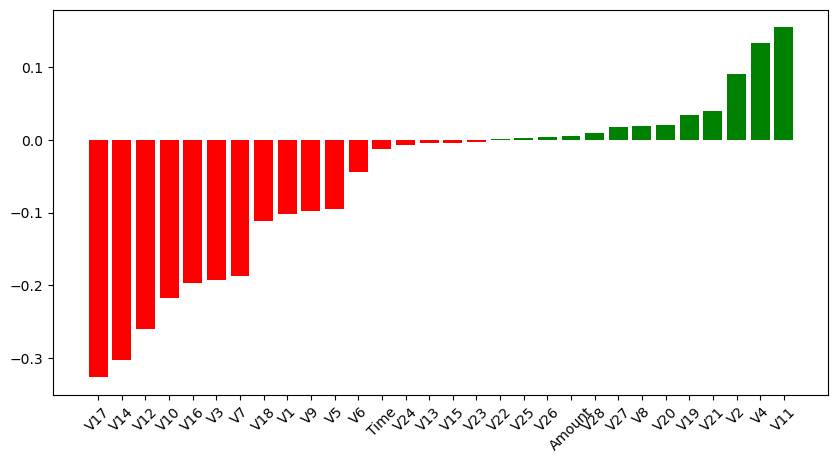

In [451]:
correlation = X.corrwith(y).sort_values()
color = ['red' if c < 0 else 'green' for c in correlation ]
plt.figure(figsize=(10,5))
plt.bar(correlation.index, correlation.values, color = color)
plt.xticks(rotation=45)

In term of correlation V2, V4, V11 have a high positive correlation with our y, meanwhile V17, V14, V12, V10 have high negative correlation with y

[LightGBM] [Info] Number of positive: 443, number of negative: 255883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 256326, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015342 -> initscore=-4.161681
[LightGBM] [Info] Start training from score -4.161681


<Axes: xlabel='0'>

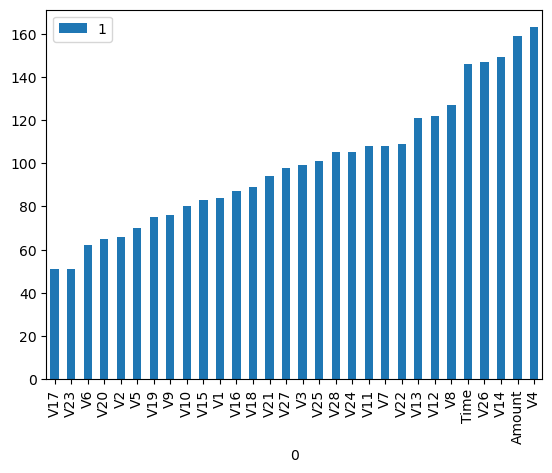

In [506]:
lgb_importance = lgb.LGBMClassifier(class_weight={0: 0.1, 1: 0.9}).fit(X_train, y_train)
df2 = pd.DataFrame([np.array(lgb_importance.feature_name_), lgb_importance.feature_importances_]).T
df2.sort_values(by=1).plot.bar(x=0, y=1)

<Axes: xlabel='0'>

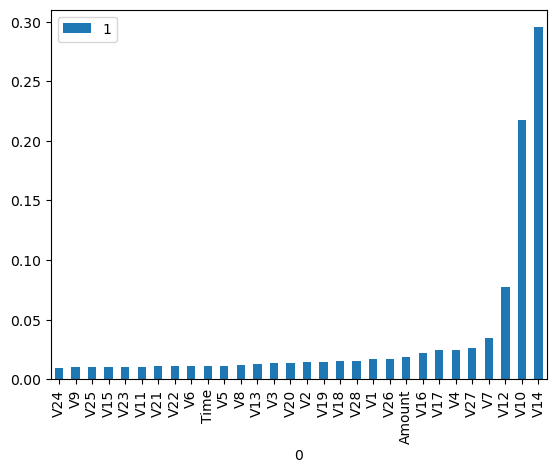

In [502]:
xgb_importance = xgb.XGBClassifier().fit(X_train, y_train)
df3 = pd.DataFrame([np.array(xgb_importance.feature_names_in_), xgb_importance.feature_importances_]).T
df3.sort_values(by=1).plot.bar(x=0, y=1)

Check the feature import from both XBboost and LightBGM also product quiet similar result where V12, V10, V14, V4 have highest contribution to the changes in y